In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DataPreprocessing
from functools import reduce

from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
def graph_data(me_filename, mom_filename, comb_str):    
    me_raw = np.load(me_filename, allow_pickle=True) #Matrix elements
    mom_raw = np.load(mom_filename, allow_pickle=True, encoding='bytes') #4-momenta of inputs
    mom_raw = np.array([np.array(element) for element in mom_raw])
    
    mandel_vars = reduce(np.multiply, DataPreprocessing.mandel_creation(['1,3','2,3'], mom_raw))
    me = np.multiply(me_raw, mandel_vars)
    
    #mandel_vars = reduce(np.multiply, DataPreprocessing.mandel_creation(['1,2'], mom_raw))
    #me = np.multiply(me, mandel_vars)

    return (me, DataPreprocessing.mandel_creation([comb_str], mom_raw)[0])

In [6]:
def transform(me):    
    me.shape = (len(me),1)
    
    scaler = StandardScaler(with_mean=False)
    me = scaler.fit_transform(me)
    
    pt = PowerTransformer(standardize=False)
    result = pt.fit_transform(me)
    print(pt.lambdas_)
    return result

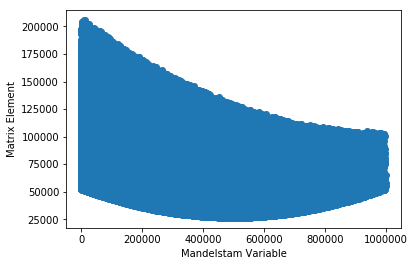

In [7]:
#me, S = graph_data('LO/MG_uuxg/3Jet_500000.npy', 'LO/LO_3_0.01_NJet/PS3_0.01_500000.npy', '3,5')
me, S = graph_data('LO/MG_uuxg_2/me_1000000.npy', 'LO/MG_uuxg_2/mom_1000000.npy', '1,3')
#me, S = graph_data('NLO/MG_uuxg/me_1000000.npy', 'NLO/MG_uuxg/mom_1000000.npy', '1,3')

#plt.yscale('log')
#plt.xscale('log')

plt.ylabel('Matrix Element')
plt.xlabel('Mandelstam Variable')
plt.scatter(S, me)

[-0.70853776]


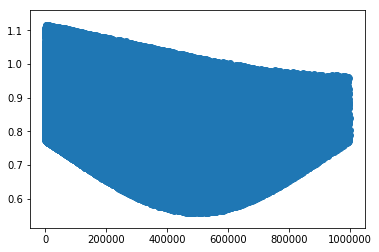

In [8]:
plt.scatter(S, transform(me))

In [10]:
print(max(transform(me)))

[-0.70853776]
[1.11601512]
